# Scenario1 Visualization

In [14]:
import matplotlib.pyplot as plt
import bqplot
import ipywidgets
import Scenario1
import numpy as np

In [2]:
%run Scenario1.py

Please input the length of the grid:
5
Please input the width of the grid:
5
Please input the number of orders in line:
0
Please input previous order location: (i.e. 1,1)
1,1
   location  Wait  Now  Wait_percentage  Now_percentage
0    (0, 0)   949   51            0.949           0.051
1    (0, 1)   958   42            0.958           0.042
2    (0, 2)   887  113            0.887           0.113
3    (0, 3)   808  192            0.808           0.192
4    (0, 4)   708  292            0.708           0.292
5    (1, 0)   935   65            0.935           0.065
6    (1, 1)   943   57            0.943           0.057
7    (1, 2)   722  278            0.722           0.278
8    (1, 3)   729  271            0.729           0.271
9    (1, 4)   601  399            0.601           0.399
10   (2, 0)   893  107            0.893           0.107
11   (2, 1)   838  162            0.838           0.162
12   (2, 2)   381  619            0.381           0.619
13   (2, 3)   389  611            0.389  

In [15]:
def heat_map_plot(result):
    array=np.asarray(result['Wait_percentage'].tolist())
    array=array.reshape(5,5)

    col_sc=bqplot.ColorScale(scheme='Reds')
    x_sc=bqplot.OrdinalScale()#value can be ordered
    y_sc=bqplot.OrdinalScale()

    x_ax=bqplot.Axis(scale=x_sc)
    y_ax=bqplot.Axis(scale=y_sc,orientation='vertical')
    c_ax=bqplot.ColorAxis(scale=col_sc,orientation='vertical',side='right')

    heat_map=bqplot.GridHeatMap(color=array,
                                scales={'color':col_sc,
                                        'row':y_sc,
                                        'column':x_sc},
                               )
    fig=bqplot.Figure(marks=[heat_map],axes=[x_ax,y_ax,c_ax])
    display(fig)

* As seen below, as the order before becomes more, the preparation time goes higher, thus the wait precentage become less (The color goes lighter). 
* If the previous order locates in (1,1), we can see that the new order location (1,1) is always the darkest one, meaning that delivery man can always wait.
* As the new order becomes more nearby the previous order location, the wait percentage becomes higher.

In [17]:
# 0 order before
result0=Scenario1.monte_carlo_scenario1(5,5,0,(1,1))
heat_map_plot(result0)

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=OrdinalScale()), ColorAxis(orienta…

In [22]:
# 1 order before
result1=Scenario1.monte_carlo_scenario1(5,5,1,(1,1))
heat_map_plot(result1)

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=OrdinalScale()), ColorAxis(orienta…

In [24]:
# 2 order before
result2=Scenario1.monte_carlo_scenario1(5,5,2,(1,1))
heat_map_plot(result2)

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=OrdinalScale()), ColorAxis(orienta…

In [25]:
# 3 order before
result3=Scenario1.monte_carlo_scenario1(5,5,3,(1,1))
heat_map_plot(result3)

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=OrdinalScale()), ColorAxis(orienta…

In [26]:
# 4 order before
result4=Scenario1.monte_carlo_scenario1(5,5,4,(1,1))
heat_map_plot(result4)

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=OrdinalScale()), ColorAxis(orienta…

In [39]:
# 5 order before
result5=Scenario1.monte_carlo_scenario1(5,5,5,(1,1))
heat_map_plot(result5)

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=OrdinalScale()), ColorAxis(orienta…

In [52]:
# Use interactive visualization to see the change more clearly
@ipywidgets.interact(queue = (0, 5, 1))
def mapplot(queue = 0):
    if queue == 0:
        heat_map_plot(result0)
    elif queue == 1:
        heat_map_plot(result1)
    elif queue == 2:
        heat_map_plot(result2)
    elif queue == 3:
        heat_map_plot(result3)
    elif queue == 4:
        heat_map_plot(result4)
    else:
        heat_map_plot(result5)

interactive(children=(IntSlider(value=0, description='queue', max=5), Output()), _dom_classes=('widget-interac…

* If the previous order location change to (3,3), the color depth of the heat map will transpose, with (3,3) being the darkest

In [51]:
# 0 order before but with previous location (3,3)
result_0_change=Scenario1.monte_carlo_scenario1(5,5,0,(3,3))
heat_map_plot(result_0_change)

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=OrdinalScale()), ColorAxis(orienta…

In [40]:
result0['order']=0
result1['order']=1
result2['order']=2
result3['order']=3
result4['order']=4
result5['order']=5
data=pd.concat([result0,result1,result2,result3,result4,result5])
wait=data[data['Wait_percentage']>0.5]
now=data[data['Wait_percentage']<=0.5]
order_wait=wait.groupby('order').size().reset_index()
order_wait.loc['3'] = ['3','0']
order_wait.loc['4'] = ['4','0']
order_wait.loc['5'] = ['5','0']
order_now=now.groupby('order').size().reset_index()

In [41]:
order_now

,order,0
0,0,7
1,1,20
2,2,21
3,3,25
4,4,25
5,5,25


In [42]:
order_wait

,order,0
0,0,18
1,1,5
2,2,4
3,3,0
4,4,0
5,5,0


* As the order number before becomes higher, the wait percentage becomes lower and the now percentage becomes higher

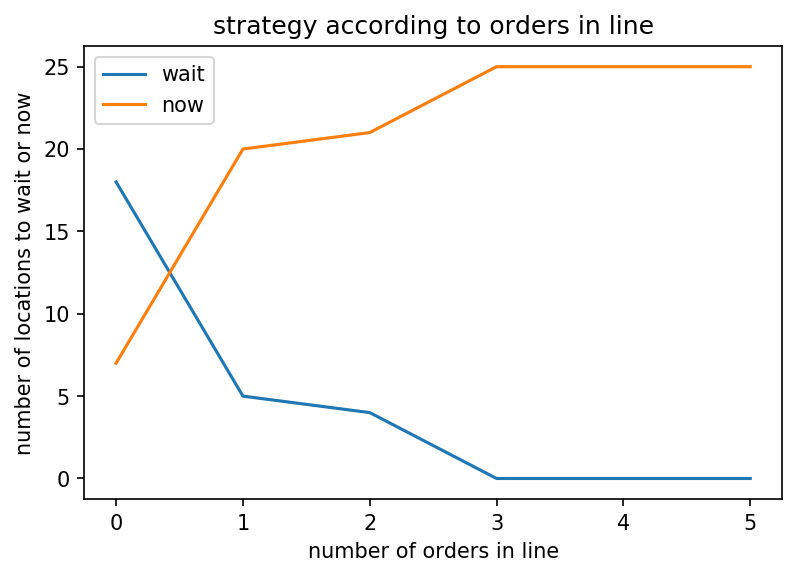

In [43]:
plt.figure(dpi=150)
plt.plot(order_wait['order'],order_wait[0],label='wait')
plt.plot(order_now['order'],order_now[0],label='now')
plt.xlabel("number of orders in line")
plt.ylabel("number of locations to wait or now")
plt.title("strategy according to orders in line")
plt.legend()

# Scenario2 Visulization

In [53]:
%run Scenario2.py

Please input the length of the grid:
5
Please input the width of the grid:
5
Please input the how many orders can be received from 8am to 8pm per day:
100
   delivery man number    profit  success rate
0                    1   695.230       0.44563
1                    2   672.105       0.52056
2                    3   748.355       0.65668
3                    4  1195.310       0.97511
4                    5  1025.000       0.98000
5                    6   845.000       0.98000
6                    7   665.000       0.98000
7                    8   485.000       0.98000


In [54]:
result

,delivery man number,profit,success rate
0,1,695.230,0.44563
1,2,672.105,0.52056
2,3,748.355,0.65668
3,4,1195.310,0.97511
4,5,1025.000,0.98000
5,6,845.000,0.98000
6,7,665.000,0.98000
7,8,485.000,0.98000


* We can easily detect that when the number of delivery man reaches 4, our profit reaches the highest

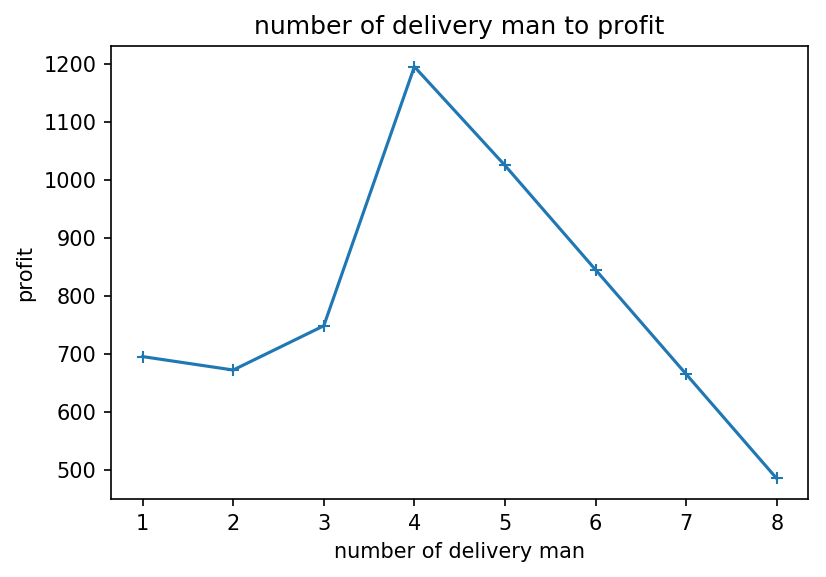

In [67]:
plt.figure(dpi=150)
plt.plot(result['delivery man number'],result['profit'],label='profit',marker='+')
plt.xlabel("number of delivery man")
plt.ylabel("profit")
plt.title("number of delivery man to profit")
plt.show()

* The success rate will increase fast at first, and then reaches its highest and remains stable at 0.98.
* The reason why it can not reach 1.00 is that there are some locations where the time to travel to is already more than 90 minutes. Therefore, no matter how many delivery men there are, orders from those locations can always not be delivered.

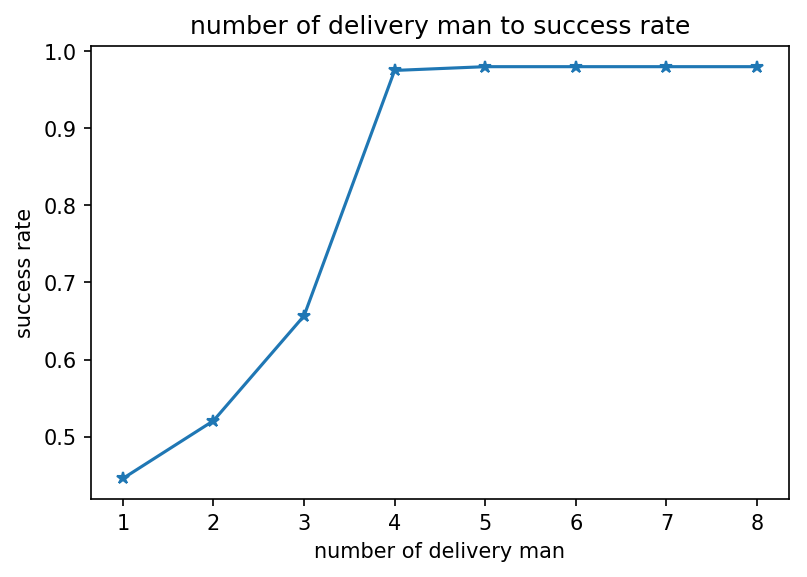

In [70]:
plt.figure(dpi=150)
plt.plot(result['delivery man number'],result['success rate'],label='success rate',marker='*')
plt.xlabel("number of delivery man")
plt.ylabel("success rate")
plt.title("number of delivery man to success rate")
plt.show()

* From the merged plot, we can see that if the number of delivery man = 4, the profit is at its peak while the success rate starts to become stable at 0.98. After this point, since the success rate no longer goes higher, the profit drops because of the salaries for delivery men.

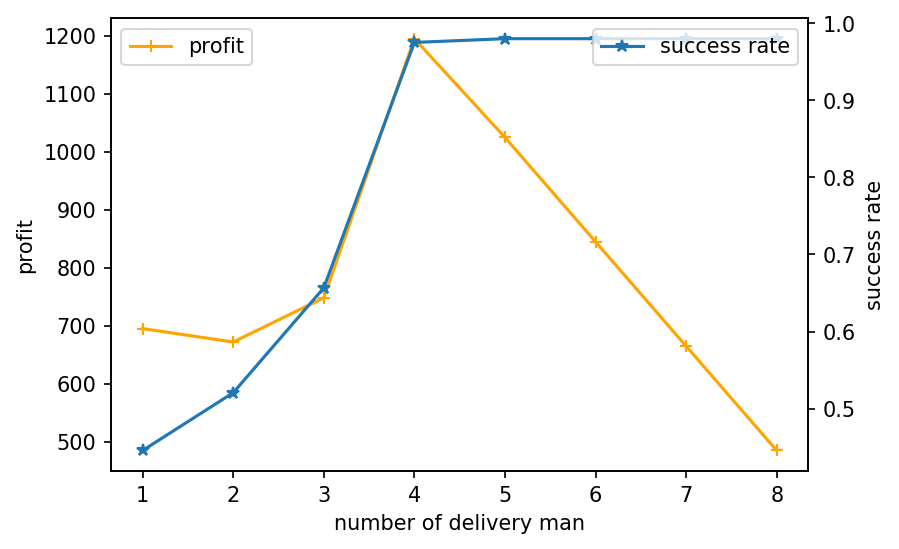

In [102]:
# Draw two plots
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111)
ax.plot(result['delivery man number'],result['profit'],label='profit',marker='+',color='orange')
ax2 = ax.twinx()
ax2.plot(result['delivery man number'],result['success rate'],label='success rate',marker='*')
ax.legend(loc='upper left')
ax.set_ylabel('profit')
ax2.legend(loc='upper right')
ax2.set_ylabel('success rate');
ax.set_xlabel('number of delivery man')
plt.show()